# Assemble all the shell scripts

# Input important parameters
## Input the observation ID, degree of right ascension and declination
## In work_dir, work_dir/obsid/odf and work_dir/obsid/rgs
```bash
source parameter.sh
```
```bash
#!/bin/bash
# This shell script should be executed in directories work_dir and work_dir/obsid/odf.
# Input the Obs.ID, ra_deg and dec_deg of the source and some other paramters.
# The 0th shell script.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023
# Define some parameters and add some comments.

# Observation ID.
# Used in unpack.sh to create directories.
# Used in image.sh for the command evselect.
# Used in lightcurve.sh for the command rgslccorr.
# Used in background.sh for the command evselect.
# Used in spectra.sh for the commands rgscombine and rgsfluxer.
obsid=0791980501
export obsid

# Right ascention and declination in degree.
# Used in rgsproc.sh for the command rgsproc.
ra_deg=54.1970
export ra_deg
dec_deg=0.5878
export dec_deg

# Image size in x and y direction, default (900,600). 
# Used in image.sh for the command evselect.
ximagesize=900
export ximagesize
yimagesize=600
export yimagesize

# Size of time bin.
# Used in lightcurve.sh for the command rgslccorr.
# Used in background.sh for the command evselect.
timebinsize=100
export timebinsize

# RGS ID and exposure ID.
# Used in image.sh for the command evselect and cxctods9.
# Used in lightcurve.sh for the command rgslccorr.
# Used in background.sh for the command evselect.
# Used in spectra.sh for the commands rgscombine and rgsfluxer.
rgsid=(1 2)
export rgsid
expid=(S004 S005)
export expid

# Size of image regions, specified by the percentage of \
# the cross-dispersion PSF covered between each pair of vertices with the same dispersion coordinate.
# Used in rgsproc.sh for the command rgsproc.
xpsfincl=90
export xpsfincl
# Size of the exclusion regions in the background region, specified by the percentage of \
# the cross-dispersion PSF covered between each pair of vertices with the same dispersion coordinate \
# and associated source.
# Used in rgsproc.sh for the command rgsproc.
xpsfexcl=95
export xpsfexcl

# Source ID.
# Used in image.sh for the command cxctods9.
# Used in lightcurve.sh for the command rgslccorr.
# Used in spectra.sh for the commands rgscombine and rgsfluxer.
srcid=3

# Number of sigma about the mean count rate to use to clip outliers.
# Used in deflare2.sh for the command deflare.
# 3.0 is the default value.
nsigma=3.0

# Note that there may be some other parameters to be set, which depends on your task.
```

# Unpack ODF data copy the rest shell scripts to where they should be
## In work_dir
```bash
source unpack.sh
```
## unpack.sh
```bash
#!/bin/bash
# This shell script should be executed in directory work_dir.
# Unpack compressed data file, which is obsid.tar.gz.
# The 1st shell script.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023
# Add some comments and some if statements.
echo "You should input the observation ID and some other necessary parameters in parameter.sh first.\n"
source $work_dir/shell_scripts/parameter.sh
rm -rf $obsid
mkdir -p $obsid/odf
mkdir -p $obsid/epic
mkdir -p $obsid/rgs
FILE=$obsid.tar.gz
if [ -f "$FILE" ]; then
    echo "$FILE exists."
    tar -xvf $obsid.tar.gz -C $obsid/odf
    tar -xf ./$obsid/odf/*.TAR -C ./$obsid/odf
else 
    echo "$FILE does not exist."
    rm -rf $obsid
    return
fi
# Copy the rest shell scripts to where they should be.
cp $work_dir/shell_scripts/parameter.sh $work_dir/$obsid/odf
cp $work_dir/shell_scripts/initialize.sh $work_dir/$obsid/odf
# parameter.sh will stay in work_dir/shell_scripts.
rsync -rv $work_dir/shell_scripts/ $work_dir/$obsid/rgs --exclude={initialize.sh,parameter.sh,main.sh}
```

In [2]:
parameter = """
#!/bin/bash
# This shell script should be executed in directories work_dir and work_dir/obsid/odf.
# Input the Obs.ID, ra_deg and dec_deg of the source and some other paramters.
# The 0th shell script.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023
# Define some parameters and add some comments.

# Observation ID.
# Used in unpack.sh to create directories.
# Used in image.sh for the command evselect.
# Used in lightcurve.sh for the command rgslccorr.
# Used in background.sh for the command evselect.
# Used in spectra.sh for the commands rgscombine and rgsfluxer.
obsid=0791980501
export obsid

# Right ascention and declination in degree.
# Used in rgsproc.sh for the command rgsproc.
ra_deg=54.1970
export ra_deg
dec_deg=0.5878
export dec_deg

# Image size in x and y direction, default (900,600). 
# Used in image.sh for the command evselect.
ximagesize=900
export ximagesize
yimagesize=600
export yimagesize

# Size of time bin.
# Used in lightcurve.sh for the command rgslccorr.
# Used in background.sh for the command evselect.
timebinsize=100
export timebinsize

# RGS ID and exposure ID.
# Used in image.sh for the command evselect and cxctods9.
# Used in lightcurve.sh for the command rgslccorr.
# Used in background.sh for the command evselect.
# Used in spectra.sh for the commands rgscombine and rgsfluxer.
rgsid=(1 2)
export rgsid
expid=(S004 S005)
export expid

# Size of image regions, specified by the percentage of \
the cross-dispersion PSF covered between each pair of vertices with the same dispersion coordinate.
# Used in rgsproc.sh for the command rgsproc.
xpsfincl=90
export xpsfincl
# Size of the exclusion regions in the background region, specified by the percentage of \
the cross-dispersion PSF covered between each pair of vertices with the same dispersion coordinate \
and associated source.
# Used in rgsproc.sh for the command rgsproc.
xpsfexcl=95
export xpsfexcl

# Source ID.
# Used in image.sh for the command cxctods9.
# Used in lightcurve.sh for the command rgslccorr.
# Used in spectra.sh for the commands rgscombine and rgsfluxer.
srcid=3

# Number of sigma about the mean count rate to use to clip outliers.
# Used in deflare2.sh for the command deflare.
# 3.0 is the default value.
nsigma=3.0

# Note that there may be some other parameters to be set, which depends on your task.
"""

with open("./shell_scripts/parameter.sh",'w+') as f:
    f.write(parameter[1:])

In [3]:
unpack = """
#!/bin/bash
# This shell script should be executed in directory work_dir.
# Unpack compressed data file, which is obsid.tar.gz.
# The 1st shell script.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023
# Add some comments and some if statements.
echo "You should input the observation ID and some other necessary parameters in parameter.sh first.\\n"
rm -rf $obsid
mkdir -p $obsid/odf
mkdir -p $obsid/epic
mkdir -p $obsid/rgs
FILE=$obsid.tar.gz
if [ -f "$FILE" ]; then
    echo "$FILE exists."
    tar -xvf $obsid.tar.gz -C $obsid/odf
    tar -xf ./$obsid/odf/*.TAR -C ./$obsid/odf
else 
    echo "$FILE does not exist."
    rm -rf $obsid
    return
fi
# Copy the rest shell scripts to where they should be.
cp $work_dir/shell_scripts/initialize.sh $work_dir/$obsid/odf
# parameter.sh will stay in work_dir/shell_scripts.
rsync -rv $work_dir/shell_scripts/ $work_dir/$obsid/rgs --exclude={initialize.sh,parameter.sh,main.sh}
"""

with open("./shell_scripts/unpack.sh",'w+') as f:
    f.write(unpack[1:])

#  *cifbuild* and *odfingest*
## In work_dir/obsid/odf
```bash
source initialize.sh
```
## initialize.sh
```bash
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/odf.
# Initialize SAS, run cifbuild and execute odfingest.
# The 2nd shell script.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023
# Add some if statements.
source $work_dir/shell_scripts/parameter.sh
SAS_DIR=/Users/liuguanfu/Workspace/SAS
source $SAS_DIR/heasoft-6.30.1/heasoft_initialize.sh
source $SAS_DIR/xmmsas_20211130_0941/setsas.sh
SAS_ODF=$PWD
export SAS_ODF
SAS_CCFPATH=/Users/liuguanfu/Workspace/SAS/CCF-old/sas_ccf
export SAS_CCFPATH
FILE=ccf.cif
if [ -f "$FILE" ]; then
    echo "$FILE exists.\n"
    echo "cifbuild command may have been executed! Please check it!"
    echo "Shall cifbuild be re-executed? (yes or no)"
    while true
    do
        read yn
        case $yn in
            [Yy]* ) 
                echo "Proceeding!"
                rm $FILE
                cifbuild
                break;;
            [Nn]* ) 
                echo "Do not re-execute cifbuild."
                break;;
            * ) 
                echo "Please answer yes or no.";;
        esac
    done
else 
    echo "$FILE does not exist. cifbuild will be executed."
    cifbuild
fi
SAS_CCF=$PWD/ccf.cif
export SAS_CCF
if [ $(ls *SUM.SAS | wc -l) -gt 0 ]; then
    echo "odfingest command may have been executed! Please check it!"
    echo "Shall odfingest be re-executed? (yes or no)"
    while true
    do
        read yn
        case $yn in
            [Yy]* ) 
                echo "Proceeding!"
                FILE=$(ls -1 *SUM.SAS)
                rm $FILE
                odfingest
                break;;
            [Nn]* ) 
                echo "Do not re-execute odfingest."
                break;;
            * ) 
                echo "Please answer yes or no.";;
        esac
    done
else 
  echo "odfingest has not been executed!\n odfingest will be executed right away."
  odfingest
fi
SAS_ODF=$PWD/$(ls -1 *SUM.SAS)
export SAS_ODF
```

In [20]:
initialize = """
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/odf.
# Initialize SAS, run cifbuild and execute odfingest.
# The 2nd shell script.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023
# Add some if statements.
source $work_dir/shell_scripts/parameter.sh
SAS_DIR=/Users/liuguanfu/Workspace/SAS
source $SAS_DIR/heasoft-6.30.1/heasoft_initialize.sh
source $SAS_DIR/xmmsas_20211130_0941/setsas.sh
SAS_ODF=$PWD
export SAS_ODF
SAS_CCFPATH=/Users/liuguanfu/Workspace/SAS/CCF-old/sas_ccf
export SAS_CCFPATH
FILE=ccf.cif
if [ -f "$FILE" ]; then
    echo "$FILE exists.\\n"
    echo "cifbuild command may have been executed! Please check it!"
    echo "Shall cifbuild be re-executed? (yes or no)"
    while true
    do
        read yn
        case $yn in
            [Yy]* ) 
                echo "Proceeding!"
                rm $FILE
                cifbuild
                break;;
            [Nn]* ) 
                echo "Do not re-execute cifbuild."
                break;;
            * ) 
                echo "Please answer yes or no.";;
        esac
    done
else 
    echo "$FILE does not exist. cifbuild will be executed."
    cifbuild
fi
SAS_CCF=$PWD/ccf.cif
export SAS_CCF
if [ $(ls *SUM.SAS | wc -l) -gt 0 ]; then
    echo "odfingest command may have been executed! Please check it!"
    echo "Shall odfingest be re-executed? (yes or no)"
    while true
    do
        read yn
        case $yn in
            [Yy]* ) 
                echo "Proceeding!"
                FILE=$(ls -1 *SUM.SAS)
                rm $FILE
                odfingest
                break;;
            [Nn]* ) 
                echo "Do not re-execute odfingest."
                break;;
            * ) 
                echo "Please answer yes or no.";;
        esac
    done
else 
  echo "odfingest has not been executed!\\n odfingest will be executed right away."
  odfingest
fi
SAS_ODF=$PWD/$(ls -1 *SUM.SAS)
export SAS_ODF
"""

with open("./shell_scripts/initialize.sh",'w+') as f:
    f.write(initialize[1:])

# Run the RGS data reduction pipeline *rgsproc*
## In work_dir/obsid/rgs
```bash
source rgsproc.sh
```
## rgsproc.sh
```bash
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/rgs.
# Run the RGS data reduction pipeline rgsproc.
# The 3rd shell script.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023
source $work_dir/shell_scripts/parameter.sh
rgsproc withsrc=yes srclabel=USER srcra=${ra_deg} srcdec=${dec_deg} witheffectiveareacorrection=yes withbackgroundmodel=yes xpsfincl=${xpsfincl} xpsfexcl=${xpsfexcl}
```

In [5]:
rgsproc = """
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/rgs.
# Run the RGS data reduction pipeline rgsproc.
# The 3rd shell script.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023
source $work_dir/shell_scripts/parameter.sh
rgsproc withsrc=yes srclabel=USER srcra=${ra_deg} srcdec=${dec_deg} \
witheffectiveareacorrection=yes withbackgroundmodel=yes xpsfincl=${xpsfincl} xpsfexcl=${xpsfexcl}
"""
with open("./shell_scripts/rgsproc.sh",'w+') as f:
    f.write(rgsproc[1:])

# Extract RGS images
## In work_dir/obsid/rgs
```bash
source image.sh
```
## image.sh
```bash
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/rgs.
# Extract RGS images.
# The 4th shell script.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023
# Use for loop to tidy up the shell scripts.

# The length of rgsid
len=${#rgsid[@]}
for i in $(seq 1 $len)
do 
    lis_evt=P${obsid}R${rgsid[$i]}${expid[$i]}EVENLI0000.FIT
    evselect table=${lis_evt}:EVENTS imageset=img_rgs${rgsid[$i]}_xdsp_dsp.fits xcolumn='M_LAMBDA' ycolumn='XDSP_CORR'
    evselect table=${lis_evt}:EVENTS imageset=img_rgs${rgsid[$i]}_pi_dsp.fits xcolumn='M_LAMBDA' ycolumn='PI' imagebinning=imageSize ximagesize=${ximagesize} yimagesize=${yimagesize}
    lis_src=P${obsid}R${rgsid[$i]}${expid[$i]}SRCLI_0000.FIT
    cxctods9 table=${lis_src}:RGS${rgsid[$i]}_SRC${srcid}_SPATIAL regtype=linear -V 0 > rgs${rgsid[$i]}_src.reg
done
```

In [6]:
image = """
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/rgs.
# Extract RGS images.
# The 4th shell script.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023
# Use for loop to tidy up the shell scripts.

# The length of rgsid
len=${#rgsid[@]}
for i in $(seq 1 $len)
do 
    lis_evt=P${obsid}R${rgsid[$i]}${expid[$i]}EVENLI0000.FIT
    evselect table=${lis_evt}:EVENTS imageset=img_rgs${rgsid[$i]}_xdsp_dsp.fits xcolumn='M_LAMBDA' \
ycolumn='XDSP_CORR'
    evselect table=${lis_evt}:EVENTS imageset=img_rgs${rgsid[$i]}_pi_dsp.fits xcolumn='M_LAMBDA' \
ycolumn='PI' imagebinning=imageSize ximagesize=${ximagesize} yimagesize=${yimagesize}
    lis_src=P${obsid}R${rgsid[$i]}${expid[$i]}SRCLI_0000.FIT
    cxctods9 table=${lis_src}:RGS${rgsid[$i]}_SRC${srcid}_SPATIAL regtype=linear -V 0 > \
rgs${rgsid[$i]}_src.reg
done
"""

with open("./shell_scripts/image.sh",'w+') as f:
    f.write(image[1:])

# Extract RGS lightcurves
## In work_dir/obsid/rgs
```bash
source lightcurve.sh
```
## lightcurve.sh
```bash
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/rgs.
# Extract RGS lightcurves.
# The 5th shell script.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023
# Tidy up the shell scripts.

rgslccorr evlist="P${obsid}R${rgsid[1]}${expid[1]}EVENLI0000.FIT P${obsid}R${rgsid[2]}${expid[2]}EVENLI0000.FIT" srclist="P${obsid}R${rgsid[1]}${expid[1]}SRCLI_0000.FIT P${obsid}R${rgsid[2]}${expid[2]}SRCLI_0000.FIT" timebinsize=${timebinsize} orders="1" sourceid=${srcid} outputsrcfilename=ltc_rgs_src.fits
```

In [7]:
lightcurve="""
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/rgs.
# Extract RGS lightcurves.
# The 5th shell script.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023
# Tidy up the shell scripts.

rgslccorr evlist="P${obsid}R${rgsid[1]}${expid[1]}EVENLI0000.FIT \
P${obsid}R${rgsid[2]}${expid[2]}EVENLI0000.FIT" \
srclist="P${obsid}R${rgsid[1]}${expid[1]}SRCLI_0000.FIT \
P${obsid}R${rgsid[2]}${expid[2]}SRCLI_0000.FIT" timebinsize=${timebinsize} orders="1" \
sourceid=${srcid} outputsrcfilename=ltc_rgs_src.fits
"""

with open("./shell_scripts/lightcurve.sh",'w+') as f:
    f.write(lightcurve[1:])

# Generate gti.fits (The last 10ks, optional)
## In work_dir/obsid/rgs
```bash
source gtigen.sh
```
## gtigen.sh
```bash
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/rgs.
# A simple example for the command tabgtigen
# Open the ltc_rgs_src.fits file, and get the start time and stop time.
# Run this shell script after executing lightcurve.sh
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023

tabgtigen table=ltc_rgs_src.fits gtiset=gti.fits timecolumn=TIME expression="(TIME in [6.990215E8:6.990304E8])"
```

# Extract background lightcurves
## In work_dir/obsid/rgs
```bash
source background.sh
```
## background.sh
```bash
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/rgs.
# Extract RGS lightcurves.
# The 6th shell script.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023
# Use for loop to tidy up the shell scripts.
len=${#rgsid[@]}
for i in $(seq 1 $len)
do 
    lis_evt=P${obsid}R${rgsid[$i]}${expid[$i]}EVENLI0000.FIT
    lis_src=P${obsid}R${rgsid[$i]}${expid[$i]}SRCLI_0000.FIT
    evselect table=${lis_evt} timebinsize=${timebinsize} rateset=ltc_rgs${rgsid[$i]}_bkg.fits makeratecolumn=yes maketimecolumn=yes expression="(CCDNR==9)&&(REGION(${lis_src}:RGS${rgsid[$i]}_BACKGROUND,M_LAMBDA,XDSP_CORR))"
done
```

In [8]:
background="""
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/rgs.
# Extract RGS lightcurves.
# The 6th shell script.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023
# Use for loop to tidy up the shell scripts.
len=${#rgsid[@]}
for i in $(seq 1 $len)
do 
    lis_evt=P${obsid}R${rgsid[$i]}${expid[$i]}EVENLI0000.FIT
    lis_src=P${obsid}R${rgsid[$i]}${expid[$i]}SRCLI_0000.FIT
    evselect table=${lis_evt} timebinsize=${timebinsize} rateset=ltc_rgs${rgsid[$i]}_bkg.fits \
makeratecolumn=yes maketimecolumn=yes \
expression="(CCDNR==9)&&(REGION(${lis_src}:RGS${rgsid[$i]}_BACKGROUND,M_LAMBDA,XDSP_CORR))"
done
"""

with open("./shell_scripts/background.sh",'w+') as f:
    f.write(background[1:])

# Remove background flares
## In work_dir/obsid/rgs
```bash
source deflare1.sh
```
## Option 1 deflare1.sh (not recommended)
```bash
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/rgs.
# Remove background flares by removing the rate larger than 4.049 (4.094 is chosen artificially).
# This method is not recommended.
# The 7th shell script.
# Option 1 for the 7th shell script, 2 options in total.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023

tabgtigen table=ltc_rgs_src.fits gtiset=gti1.fits timecolumn=TIME expression="(RATE<=4.049)"
rgsproc auxgtitables=gti1.fits entrystage=3:filter finalstage=5:fluxing witheffectiveareacorrection=yes withbackgroundmodel=yes
```

## In work_dir/obsid/rgs
```bash
source deflare2.sh
```
## Option 2 deflare2.sh (recommended)
```bash
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/rgs.
# Remove background flares with sigma clipping method.
# This method is recommended.
# The 7th shell script.
# Option 2 for the 7th shell script, 2 options in total.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023

conda activate ciao-4.14
# deflare command is provided by CIAO
len=${#rgsid[@]}
for i in $(seq 1 $len)
do
deflare infile=ltc_rgs${rgsid[$i]}_bkg.fits outfile=gti2R${rgsid[$i]}.fits method=sigma nsigma=${nsigma} plot=yes save=deflareR${rgsid[$i]}.png
done
conda deactivate
echo "Re-execute initialize.sh. \n"
echo "Please answer 'No' in the following two questions if you execute main.sh.\n"
# Move to work_dir/obsid/odf.
cd ../odf
source initialize.sh
# Move back to work_dir/obsid/rgs.
cd ../rgs
for i in $(seq 1 $len)
do
ftdelhdu infile="gti2R${rgsid[$i]}.fits[1]" outfile="gti2R${rgsid[$i]}.fits" clobber=yes
done
# ftdelhdu can also be used as follows.
# ftdelhdu infile="gti2R${rgsid[$i]}.fits[FILTER]" outfile="gti2R${rgsid[$i]}.fits" clobber=yes
echo "Choose one gti file to use. (1 or 2) \n"
while true
    do
        read i
        case $i in
            [1] ) 
                echo "Use gti2R${rgsid[$i]}.fits"
                break;;
            [2] ) 
                echo "Use gti2R${rgsid[$i]}.fits"
                break;;
            * ) 
                echo "Please choose 1 or 2.";;
        esac
    done
rgsproc auxgtitables=gti2R${rgsid[$i]}.fits entrystage=3:filter finalstage=5:fluxing witheffectiveareacorrection=yes withbackgroundmodel=yes
```
### Attention!
To run deflare, we should activate the ciao environments. If so, we should rerun the initialize.sh after deactivating ciao environments! 
## A simple introduction to ftdelhdu
Delete the FILTER head data unit (hdu).
```bash
#!/bin/bash
ftdelhdu infile="gti2.fits[1]" outfile="gti2.fits" clobber=yes
```
Or 
```bash
#!/bin/bash
ftdelhdu infile="gti2.fits[FILTER]" outfile="gti2.fits" clobber=yes
```
# A question: Which RGS chip shall we use to generate gti.fits?


## RGS1 background lightcurve for Obs.ID=0791980501 (HR 1099)
![RGS1 background lightcurve for Obs.ID=0791980501 (HR 1099).](./0791980501-gti1/rgs/deflareR1.png)

In [9]:
deflare1="""
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/rgs.
# Remove background flares by removing the rate larger than 4.049 (4.094 is chosen artificially).
# This method is not recommended.
# The 7th shell script.
# Option 1 for the 7th shell script, 2 options in total.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023

tabgtigen table=ltc_rgs_src.fits gtiset=gti1.fits timecolumn=TIME expression="(RATE<=4.049)"
rgsproc auxgtitables=gti1.fits entrystage=3:filter finalstage=5:fluxing \
witheffectiveareacorrection=yes withbackgroundmodel=yes
"""

with open("./shell_scripts/deflare1.sh",'w+') as f:
    f.write(deflare1[1:])

In [10]:
deflare2="""
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/rgs.
# Remove background flares with sigma clipping method.
# This method is recommended.
# The 7th shell script.
# Option 2 for the 7th shell script, 2 options in total.
# Author: Guan-Fu Liu
# Date: Feb. 20, 2023

conda activate ciao-4.14
# deflare command is provided by CIAO
len=${#rgsid[@]}
for i in $(seq 1 $len)
do
deflare infile=ltc_rgs${rgsid[$i]}_bkg.fits outfile=gti2R${rgsid[$i]}.fits method=sigma \
nsigma=${nsigma} plot=yes save=deflareR${rgsid[$i]}.png
done
conda deactivate
echo "Re-execute initialize.sh. \\n"
echo "Please answer 'No' in the following two questions if you execute main.sh.\\n"
# Move to work_dir/obsid/odf.
cd ../odf
source initialize.sh
# Move back to work_dir/obsid/rgs.
cd ../rgs
for i in $(seq 1 $len)
do
ftdelhdu infile="gti2R${rgsid[$i]}.fits[1]" outfile="gti2R${rgsid[$i]}.fits" clobber=yes
done
# ftdelhdu can also be used as follows.
# ftdelhdu infile="gti2R${rgsid[$i]}.fits[FILTER]" outfile="gti2R${rgsid[$i]}.fits" clobber=yes
echo "Choose one gti file to use. (1 or 2) \\n"
while true
    do
        read i
        case $i in
            [1] ) 
                echo "Use gti2R${rgsid[$i]}.fits"
                break;;
            [2] ) 
                echo "Use gti2R${rgsid[$i]}.fits"
                break;;
            * ) 
                echo "Please choose 1 or 2.";;
        esac
    done
rgsproc auxgtitables=gti2R${rgsid[$i]}.fits entrystage=3:filter finalstage=5:fluxing \
witheffectiveareacorrection=yes withbackgroundmodel=yes
"""

with open("./shell_scripts/deflare2.sh",'w+') as f:
    f.write(deflare2[1:])

# Extract RGS spectra
## In work_dir/obsid/rgs
```bash
source spectra.sh
```
## spectra.sh
```bash
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/rgs.
# Combine RGS1 and RGS2 spectra of the same spectral order and generate fluxed spectra.
# The 8th shell script.
# Author: Guan-Fu Liu
# Date: Mar. 2nd, 2023
# Process 1st and 2nd in one shell script.
# The filename convention is as follows.
# Write lists of files that contain  source (src.lis), response (rsp.lis) and background (bkg.lis).
# • P${obsid}R${rgsid}${expid}BGSPEC100${srcid}.FIT: 1st-order local background spectrum file
# • P${obsid}R${rgsid}${expid}BGSPEC200${srcid}.FIT: 2nd-order local background spectrum file
# • P${obsid}R${rgsid}${expid}MBSPEC1000.FIT: 1st-order model background spectrum
# • P${obsid}R${rgsid}${expid}MBSPEC2000.FIT: 2nd-order model background spectrum
# • P${obsid}R${rgsid}${expid}RSPMAT100${srcid}.FIT: 1st-order response file
# • P${obsid}R${rgsid}${expid}RSPMAT200${srcid}.FIT: 2nd-order response file
# • P${obsid}R${rgsid}${expid}SRSPEC100${srcid}.FIT: 1st-order source spectral file
# • P${obsid}R${rgsid}${expid}SRSPEC200${srcid}.FIT: 2nd-order source spectral file

for i in 1 2
do
    echo "P${obsid}R${rgsid[1]}${expid[1]}SRSPEC${i}00${srcid}.FIT P${obsid}R${rgsid[2]}${expid[2]}SRSPEC${i}00${srcid}.FIT" > src_o${i}.lis
    echo "P${obsid}R${rgsid[1]}${expid[1]}RSPMAT${i}00${srcid}.FIT P${obsid}R${rgsid[2]}${expid[2]}RSPMAT${i}00${srcid}.FIT" > rsp_o${i}.lis
    echo "P${obsid}R${rgsid[1]}${expid[1]}MBSPEC${i}000.FIT P${obsid}R${rgsid[2]}${expid[2]}MBSPEC${i}000.FIT" > bkg_o${i}.lis
    rgscombine pha="$(cat src_o${i}.lis)" rmf="$(cat rsp_o${i}.lis)" bkg="$(cat bkg_o${i}.lis)" filepha=rgs_combine_src_o${i}.fits filermf=rgs_combine_o${i}.rsp filebkg=rgs_combine_bkg_o${i}.fits

# Include the background files via the keyword agrument “bkg”
    rgsfluxer pha="$(cat src_o${i}.lis)" rmf="$(cat rsp_o${i}.lis)" bkg="$(cat bkg_o${i}.lis)" file=rgs_flux_o${i}.fits
done
```

In [1]:
spectra="""
#!/bin/bash
# This shell script should be executed in directory work_dir/obsid/rgs.
# Combine RGS1 and RGS2 spectra of the same spectral order and generate fluxed spectra.
# The 8th shell script.
# Author: Guan-Fu Liu
# Date: Feb. 21, 2023
# Use for loop to tidy up the shell script.
# The filename convention is as follows.
# Write lists of files that contain  source (src.lis), response (rsp.lis) and background (bkg.lis).
# • P${obsid}R${rgsid}${expid}BGSPEC100${srcid}.FIT: 1st-order local background spectrum file
# • P${obsid}R${rgsid}${expid}BGSPEC200${srcid}.FIT: 2nd-order local background spectrum file
# • P${obsid}R${rgsid}${expid}MBSPEC1000.FIT: 1st-order model background spectrum
# • P${obsid}R${rgsid}${expid}MBSPEC2000.FIT: 2nd-order model background spectrum
# • P${obsid}R${rgsid}${expid}RSPMAT100${srcid}.FIT: 1st-order response file
# • P${obsid}R${rgsid}${expid}RSPMAT200${srcid}.FIT: 2nd-order response file
# • P${obsid}R${rgsid}${expid}SRSPEC100${srcid}.FIT: 1st-order source spectral file
# • P${obsid}R${rgsid}${expid}SRSPEC200${srcid}.FIT: 2nd-order source spectral file

for i in 1 2
do
    echo "P${obsid}R${rgsid[1]}${expid[1]}SRSPEC${i}00${srcid}.FIT \
    P${obsid}R${rgsid[2]}${expid[2]}SRSPEC${i}00${srcid}.FIT" > src_o${i}.lis
    echo "P${obsid}R${rgsid[1]}${expid[1]}RSPMAT${i}00${srcid}.FIT \
    P${obsid}R${rgsid[2]}${expid[2]}RSPMAT${i}00${srcid}.FIT" > rsp_o${i}.lis
    echo "P${obsid}R${rgsid[1]}${expid[1]}MBSPEC${i}000.FIT \
    P${obsid}R${rgsid[2]}${expid[2]}MBSPEC${i}000.FIT" > bkg_o${i}.lis
    rgscombine pha="$(cat src_o${i}.lis)" rmf="$(cat rsp_o${i}.lis)" \
    bkg="$(cat bkg_o${i}.lis)" filepha=rgs_combine_src_o${i}.fits \
    filermf=rgs_combine_o${i}.rsp filebkg=rgs_combine_bkg_o${i}.fits

# Include the background files via the keyword agrument “bkg”
    rgsfluxer pha="$(cat src_o${i}.lis)" rmf="$(cat rsp_o${i}.lis)" \
    bkg="$(cat bkg_o${i}.lis)" file=rgs_flux_o${i}.fits
done
"""

with open("./shell_scripts/spectra.sh",'w+') as f:
    f.write(spectra[1:])

---
Summary
---
| Step | Shell scripts  | Purpose                                   | Destination Directory               | Notes                                                |
|------|----------------|-------------------------------------------|-------------------------------------|-------------------------------------------------------|
| 0    | parameter.sh | Input important parameters     | work_dir/shell_scripts  |                                                       |
| 1    | unpack.sh      | Unpack odf data and copy the rest shell scripts to where they should be                  | work_dir                      |                                                       |
| 2    | initialize.sh  | Initialize and run cifbuild and odfingest | work_dir/obsid/odf                  |                                                       |
| 3    | rgsproc.sh     | Run rgsproc                               | work_dir/obsid/rgs                  |                                                       |
| 4    | image.sh       | Extract RGS images                        | work_dir/obsid/rgs                  |                                                       |
| 5    | lightcurves.sh | Extract RGS lightcurves                   | work_dir/obsid/rgs                  |                                                       |
| 6    | background.sh  | Extract background lightcurves            | work_dir/obsid/rgs                  |                                                       |
| 7    | deflare1.sh    | Remove background flares                  | work_dir/obsid/rgs                  | Choose one to execute, and deflare2.sh is recommended |
| 7    | deflare2.sh    | Remove background flares                  | work_dir/obsid/rgs                  | Choose one to execute, and deflare2.sh is recommended |
| 8    | spectra.sh     | Extra fluxed spectra                      | work_dir/obsid/rgs                  |                                                       |

\
obsid.tar.gz: in work_dir\

main.sh: Run the above shell scripts in one shell script. \
The above shell scripts are in work_dir/shell_scripts. 
Therefore, all the shell scripts will be copied to their corresponding destination directory (see the table above) except the parameter.sh. 
I just keep one paramter.sh to avoid some confusion.

Pipeline\

1. Modify parameter.sh
2. Source main.sh
3. Plot figures

In main.sh:
1. Source unpack.sh
2. Source initialize.sh
3. Source rgsproc.sh
4. Source image.sh
5. Source lightcurve.sh
6. Source background.sh
7. Source deflare2.sh (or deflare1.sh)
8. Source spectra.sh



# Run all the above shell scripts in one shell script
## In work_dir/shell_scripts
```bash
source main.sh
```
## main.sh
```bash
#!/bin/bash
# Author: Guan-Fu Liu
# Date: Feb 21., 2023
# Run the pipeline all in one.
# The pipeline goes as follows,
# 0. Modify parameter.sh
# 1. Source unpack.sh
# 2. Source initialize.sh
# 3. Source rgsproc.sh
# 4. Source image.sh
# 5. Source lightcurve.sh
# 6. Source background.sh
# 7. Source deflare2.sh (or deflare1.sh)
# 8. Source spectra.sh
# All the shell scripts are in the directory work_dir/shell_scripts.
# The archive format data file obsid.tar.gz should be in the directory work_dir.


echo "Did you input the right parameters in paramter.sh? (yes or no)\n"
while true
do
    read yn
    case $yn in
        [Yy]* ) 
            echo "Proceeding!"
            break;;
        [Nn]* ) 
            echo "Stop here!"
            return
            # return will skip the rest of this shell script.
            # break here is just for completing the while loop.
            break;;
        * ) 
            echo "Please answer yes or no.";;
    esac
done

# In work_dir/shell_scripts
cp unpack.sh ../
# Move to work_dir
cd ..
# In work_dir
work_dir=$PWD
export work_dir
source $work_dir/shell_scripts/parameter.sh
source unpack.sh 2>&1 | tee unpack.log
# Move to work_dir/obsid/odf
cd $work_dir/$obsid/odf
# In work_dir/obsid/odf
# The environment variable defined and exported in initialize.sh will be unset by tee.
# Why?
# source initialize.sh 2>&1 | tee initialize.log
echo "The standard output and standard error will be redirected to file initialize.log"
source initialize.sh  > initialize.log 2>&1
echo "cat the file initialize.log"
cat initialize.log
# Move to work_dir/obsid/rgs
cd $work_dir/$obsid/rgs
source rgsproc.sh 2>&1 | tee rgsproc.log
source image.sh 2>&1 | tee image.log
source lightcurve.sh 2>&1 | tee lightcurve.log
source background.sh 2>&1 | tee background.log
source deflare2.sh 2>&1 | tee deflare2.log
source spectra.sh 2>&1 | tee spectra.log
```

In [19]:
main = """
#!/bin/bash
# Author: Guan-Fu Liu
# Date: Feb 21., 2023
# Run the pipeline all in one.
# The pipeline goes as follows,
# 0. Modify parameter.sh
# 1. Source unpack.sh
# 2. Source initialize.sh
# 3. Source rgsproc.sh
# 4. Source image.sh
# 5. Source lightcurve.sh
# 6. Source background.sh
# 7. Source deflare2.sh (or deflare1.sh)
# 8. Source spectra.sh
# All the shell scripts are in the directory work_dir/shell_scripts.
# The archive format data file obsid.tar.gz should be in the directory work_dir.


echo "Did you input the right parameters in paramter.sh? (yes or no)\\n"
while true
do
    read yn
    case $yn in
        [Yy]* ) 
            echo "Proceeding!"
            break;;
        [Nn]* ) 
            echo "Stop here!"
            return
            # return will skip the rest of this shell script.
            # break here is just for completing the while loop.
            break;;
        * ) 
            echo "Please answer yes or no.";;
    esac
done

# In work_dir/shell_scripts
cp unpack.sh ../
# Move to work_dir
cd ..
# In work_dir
work_dir=$PWD
export work_dir
source $work_dir/shell_scripts/parameter.sh
source unpack.sh 2>&1 | tee unpack.log
# Move to work_dir/obsid/odf
cd $work_dir/$obsid/odf
# In work_dir/obsid/odf
# The environment variable defined and exported in initialize.sh will be unset by tee.
# Why?
# source initialize.sh 2>&1 | tee initialize.log
echo "The standard output and standard error will be redirected to file initialize.log"
source initialize.sh  > initialize.log 2>&1
echo "cat the file initialize.log"
cat initialize.log
# Move to work_dir/obsid/rgs
cd $work_dir/$obsid/rgs
source rgsproc.sh 2>&1 | tee rgsproc.log
source image.sh 2>&1 | tee image.log
source lightcurve.sh 2>&1 | tee lightcurve.log
source background.sh 2>&1 | tee background.log
source deflare2.sh 2>&1 | tee deflare2.log
source spectra.sh 2>&1 | tee spectra.log
"""

with open("./shell_scripts/main.sh",'w+') as f:
    f.write(main[1:])

# A problem caused by tee
```bash
source initialize.sh 2>&1 | tee initialize.log
```
In initialize.sh, I define and export some environment variables, such as SAS_CCF, et al., but they will be unset by the command tee.

The following command will not cause this problem.
```bash
source initialize.sh  > initialize.log 2>&1
```

In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook

# Lightcurve of source

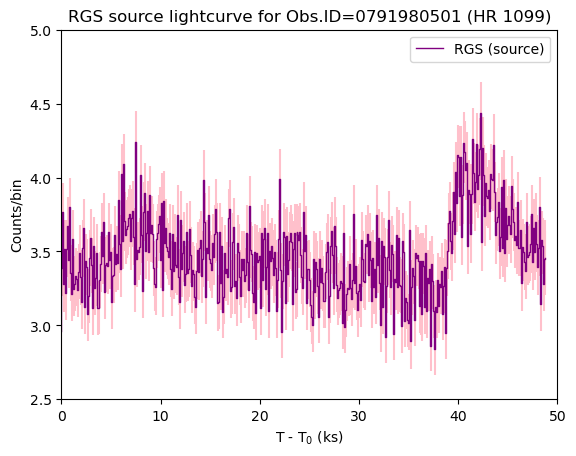

In [38]:
ltc = fits.open("./0791980501/rgs/ltc_rgs_src.fits")
t = ltc['RATE'].data['TIME']
t = (t-t[0])/1e3
rate = ltc['RATE'].data['RATE']
rate_err = ltc['RATE'].data['ERROR']

sep = 1
fig, ax = plt.subplots(dpi=100)
ax.errorbar(t[::sep],rate[::sep],yerr=rate_err[::sep],linestyle='none',color='purple',ecolor='pink')
ax.step(t[::sep],rate[::sep],linewidth=1,color='purple',label="RGS (source)")
ax.set_xlim(0,50)
ax.set_ylim(2.5,5.0)
# ax.set_xticks(np.linspace(0,50,10+1),minor=True,direction='in')
# ax.set_xticks(np.linspace(10,40,3+1),minor=False,direction='in')
# ax.set_xticklabels(np.linspace(10,40,3+1,dtype=np.int64),minor=False)
# ax.set_yticks(np.linspace(2.5,5.0,25+1),minor=True,direction='in')
# ax.set_yticks(np.linspace(2.5,5.0,5+1),minor=False,direction='in')
# ax.set_yticklabels(np.linspace(2.5,5.0,5+1),minor=False)

# ax.tick_params(direction='in',which='both')
ax.set_xlabel(r'T - T$_{0}$ (ks)')
ax.set_ylabel('Counts/bin')
ax.set_title('RGS source lightcurve for Obs.ID=0791980501 (HR 1099)')
ax.legend()
plt.show()

# Lightcurve of background

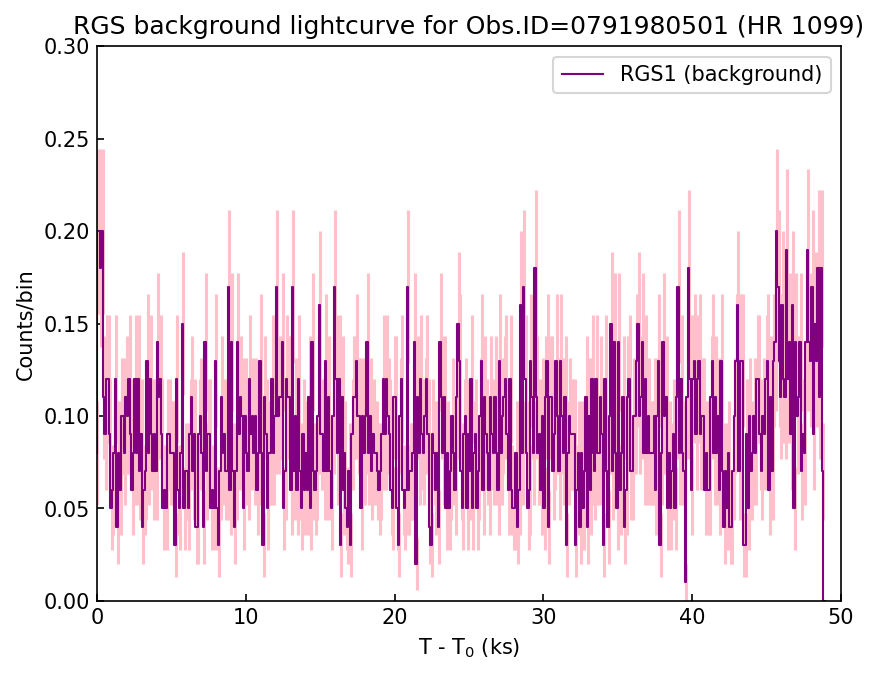

In [39]:
bkg1 = fits.open("./0791980501/rgs/ltc_rgs1_bkg.fits")
t = bkg1['RATE'].data['TIME']
t = (t-t[0])/1e3
rate = bkg1['RATE'].data['RATE']
rate_err = bkg1['RATE'].data['ERROR']

sep = 1
fig, ax = plt.subplots(dpi=150)
ax.errorbar(t[::sep],rate[::sep],yerr=rate_err[::sep],linestyle='none',color='purple',ecolor='pink')
ax.step(t[::sep],rate[::sep],color='purple',linewidth=1,label="RGS1 (background)")
ax.set_xlim(0,50)
ax.set_ylim(0,0.3)
# ax.set_xticks(np.linspace(0,50,10+1),minor=True,direction='in')
# ax.set_xticks(np.linspace(10,40,3+1),minor=False,direction='in')
# ax.set_xticklabels(np.linspace(10,40,3+1,dtype=np.int64),minor=False)
# ax.set_yticks(np.arange(0,35,5)/100,minor=False,direction='in')
# ax.set_yticklabels(np.arange(0,35,5)/100,minor=False)

ax.tick_params(direction='in',which='both')
ax.set_xlabel(r'T - T$_{0}$ (ks)')
ax.set_ylabel('Counts/bin')
ax.set_title('RGS background lightcurve for Obs.ID=0791980501 (HR 1099)')
ax.legend()
plt.show()

# Combined and fluxed RGS spectra

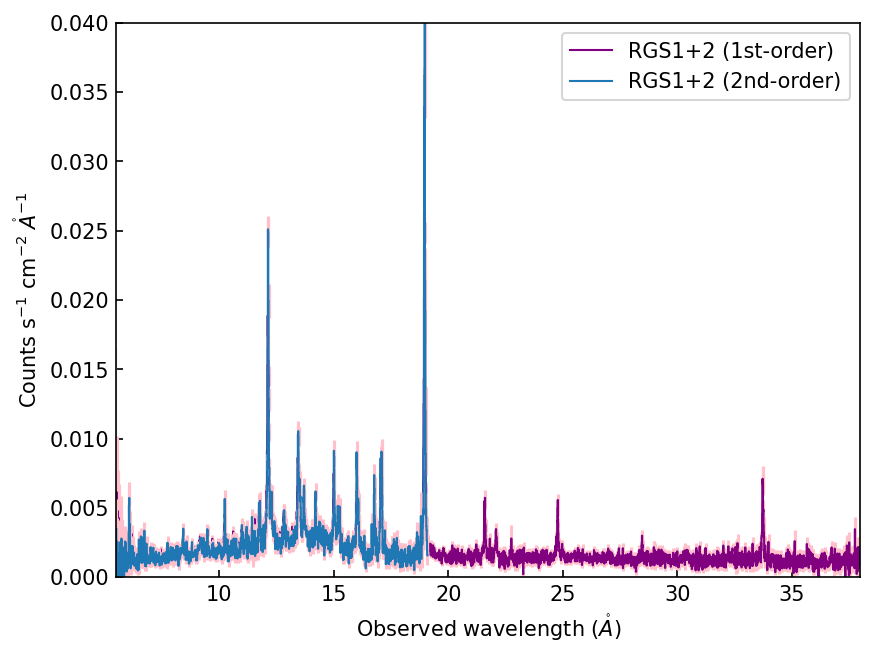

In [26]:
flux1 = fits.open("./0791980501/rgs/rgs_flux_o1.fits")
x1 = flux1['FLUXED'].data['CHANNEL']
y1 = flux1['FLUXED'].data['FLUX']
yerr1 = flux1['FLUXED'].data['ERROR']
x1 = x1[~np.isnan(yerr1)]
y1 = y1[~np.isnan(yerr1)]
yerr1 = yerr1[~np.isnan(yerr1)]
sep = 1
fig, ax = plt.subplots(nrows=1,ncols=1,dpi=150)
ax.errorbar(x1[::sep],y1[::sep],yerr=yerr1[::sep],linestyle='none',color='purple',ecolor='pink')
ax.step(x1[::sep],y1[::sep],color='purple',linewidth=1,label='RGS1+2 (1st-order)')

flux1 = fits.open("./0791980501/rgs/rgs_flux_o2.fits")
x1 = flux1['FLUXED'].data['CHANNEL']
y1 = flux1['FLUXED'].data['FLUX']
yerr1 = flux1['FLUXED'].data['ERROR']
x1 = x1[~np.isnan(yerr1)]
y1 = y1[~np.isnan(yerr1)]
yerr1 = yerr1[~np.isnan(yerr1)]
sep = 1

ax.errorbar(x1[::sep],y1[::sep],yerr=yerr1[::sep],linestyle='none',color='tab:blue',ecolor='pink')
ax.step(x1[::sep],y1[::sep],color='tab:blue',linewidth=1,label='RGS1+2 (2nd-order)')

ax.set_xlabel(r'Observed wavelength ($\mathring{A}$)')
ax.set_ylabel(r'Counts s$^{-1}$ $\mathrm{cm}^{-2}$ $\mathring{A}^{-1}$')
ax.set_xlim(5.5,38)
ax.set_ylim(0,0.040)

# ax.set_xticks(ticks=np.arange(55,385,5)/10,minor=True,direction='in')
# ax.set_xticks(np.arange(100,380,50)/10,minor=False,direction='in')
# ax.set_xticklabels(np.arange(10,40,5,dtype=int),minor=False)

# ax.set_yticks(np.arange(0,45,1)/1000,minor=True,direction='in')
# ax.set_yticks(np.arange(0,45,5)/1000,minor=False,direction='in')
# ax.set_yticklabels(['%0.3f'%a for a in np.arange(0,45,5)/1000],minor=False)

ax.tick_params(direction='in',which='both')

ax.legend()
plt.show()

# A tentative answer to the question ``which rgs shall we use to generate gti.fits''

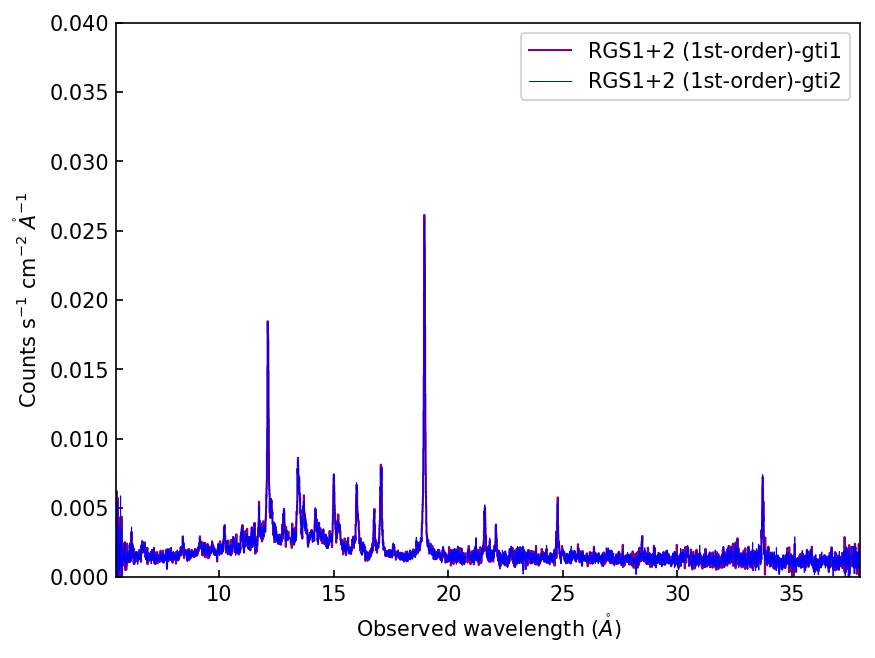

In [37]:
flux1 = fits.open("./0791980501-gti1/rgs/rgs_flux_o1.fits")
x1 = flux1['FLUXED'].data['CHANNEL']
y1 = flux1['FLUXED'].data['FLUX']
yerr1 = flux1['FLUXED'].data['ERROR']
x1 = x1[~np.isnan(yerr1)]
y1 = y1[~np.isnan(yerr1)]
yerr1 = yerr1[~np.isnan(yerr1)]
sep = 1
fig, ax = plt.subplots(nrows=1,ncols=1,dpi=150)
# ax.errorbar(x1[::sep],y1[::sep],yerr=yerr1[::sep],linestyle='none',color='purple',ecolor='pink')
ax.step(x1[::sep],y1[::sep],color='purple',linewidth=1,label='RGS1+2 (1st-order)-gti1')

flux1 = fits.open("./0791980501-gti2/rgs/rgs_flux_o1.fits")
x1 = flux1['FLUXED'].data['CHANNEL']
y1 = flux1['FLUXED'].data['FLUX']
yerr1 = flux1['FLUXED'].data['ERROR']
x1 = x1[~np.isnan(yerr1)]
y1 = y1[~np.isnan(yerr1)]
yerr1 = yerr1[~np.isnan(yerr1)]
sep = 1
# ax.errorbar(x1[::sep],y1[::sep],yerr=yerr1[::sep],linestyle='none',color='blue',ecolor='black')
ax.step(x1[::sep],y1[::sep],color='blue',linewidth=0.5,label='RGS1+2 (1st-order)-gti2')

ax.set_xlabel(r'Observed wavelength ($\mathring{A}$)')
ax.set_ylabel(r'Counts s$^{-1}$ $\mathrm{cm}^{-2}$ $\mathring{A}^{-1}$')
ax.set_xlim(5.5,38)
ax.set_ylim(0,0.040)

# ax.set_xticks(np.arange(55,385,5)/10,minor=True,direction='in')
# ax.set_xticks(np.arange(100,380,50)/10,minor=False,direction='in')
# ax.set_xticklabels(np.arange(10,40,5,dtype=int),minor=False)

# ax.set_yticks(np.arange(0,45,1)/1000,minor=True,direction='in')
# ax.set_yticks(np.arange(0,45,5)/1000,minor=False,direction='in')
# ax.set_yticklabels(['%0.3f'%a for a in np.arange(0,45,5)/1000],minor=False)

ax.tick_params(direction='in',which='both')

ax.legend()
plt.show()

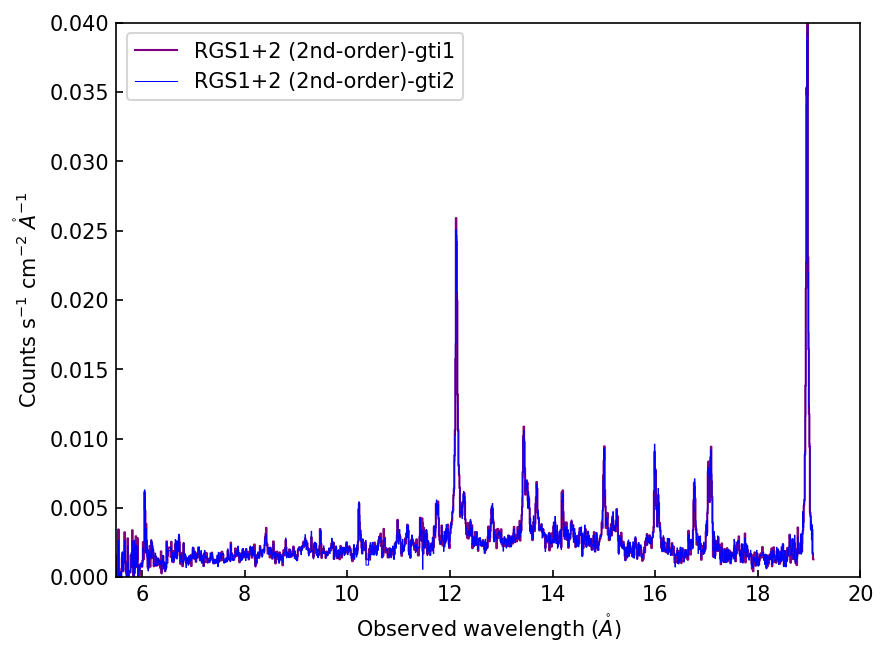

In [32]:
flux1 = fits.open("./0791980501-gti1/rgs/rgs_flux_o2.fits")
x1 = flux1['FLUXED'].data['CHANNEL']
y1 = flux1['FLUXED'].data['FLUX']
yerr1 = flux1['FLUXED'].data['ERROR']
x1 = x1[~np.isnan(yerr1)]
y1 = y1[~np.isnan(yerr1)]
yerr1 = yerr1[~np.isnan(yerr1)]
sep = 1
fig, ax = plt.subplots(nrows=1,ncols=1,dpi=150)
# ax.errorbar(x1[::sep],y1[::sep],yerr=yerr1[::sep],linestyle='none',color='purple',ecolor='pink')
ax.step(x1[::sep],y1[::sep],color='purple',linewidth=1,label='RGS1+2 (2nd-order)-gti1')

flux1 = fits.open("./0791980501-gti2/rgs/rgs_flux_o2.fits")
x1 = flux1['FLUXED'].data['CHANNEL']
y1 = flux1['FLUXED'].data['FLUX']
yerr1 = flux1['FLUXED'].data['ERROR']
x1 = x1[~np.isnan(yerr1)]
y1 = y1[~np.isnan(yerr1)]
yerr1 = yerr1[~np.isnan(yerr1)]
sep = 1
# ax.errorbar(x1[::sep],y1[::sep],yerr=yerr1[::sep],linestyle='none',color='blue',ecolor='black')
ax.step(x1[::sep],y1[::sep],color='blue',linewidth=0.5,label='RGS1+2 (2nd-order)-gti2')

ax.set_xlabel(r'Observed wavelength ($\mathring{A}$)')
ax.set_ylabel(r'Counts s$^{-1}$ $\mathrm{cm}^{-2}$ $\mathring{A}^{-1}$')
ax.set_xlim(5.5,20)
ax.set_ylim(0,0.040)

# ax.set_xticks(np.arange(55,205,5)/10,minor=True,direction='in')
# ax.set_xticks(np.arange(100,250,50)/10,minor=False,direction='in')
# ax.set_xticklabels(np.arange(10,25,5,dtype=int),minor=False)

# ax.set_yticks(np.arange(0,45,1)/1000,minor=True,direction='in')
# ax.set_yticks(np.arange(0,45,5)/1000,minor=False,direction='in')
# ax.set_yticklabels(['%0.3f'%a for a in np.arange(0,45,5)/1000],minor=False)

ax.tick_params(direction='in',which='both')

ax.legend()
plt.show()

## It seems that there is not too much difference between the combined and fluxed spectra of both 1st and 2nd order when using different good time interval files generated from different RGS chips.

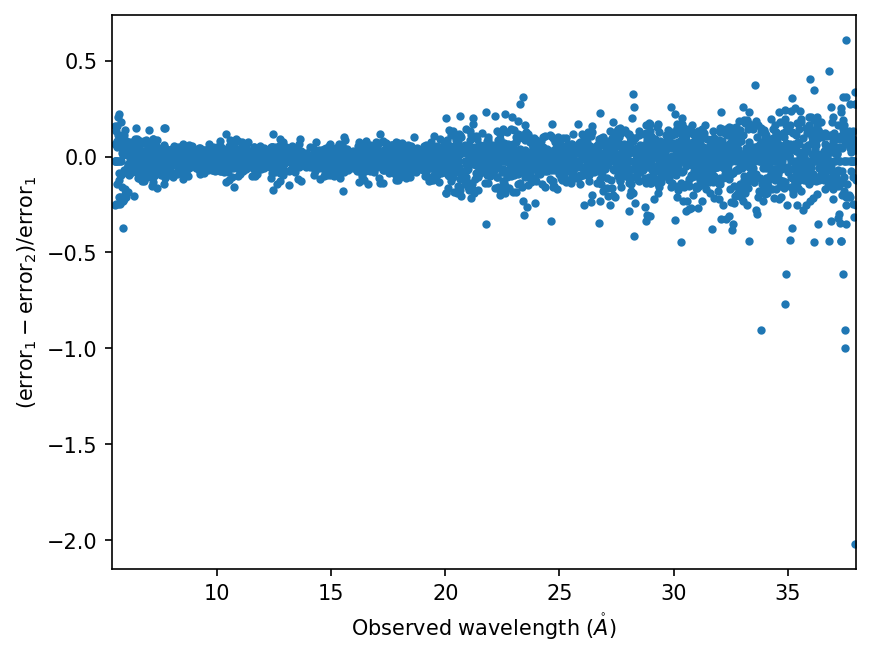

In [33]:
flux1 = fits.open("./0791980501-gti1/rgs/rgs_flux_o1.fits")
x1 = flux1['FLUXED'].data['CHANNEL']
y1 = flux1['FLUXED'].data['FLUX']
yerr1 = flux1['FLUXED'].data['ERROR']
x1 = x1[~np.isnan(yerr1)]
y1 = y1[~np.isnan(yerr1)]
yerr1 = yerr1[~np.isnan(yerr1)]

flux2 = fits.open("./0791980501-gti2/rgs/rgs_flux_o1.fits")
x2 = flux2['FLUXED'].data['CHANNEL']
y2 = flux2['FLUXED'].data['FLUX']
yerr2 = flux2['FLUXED'].data['ERROR']
x2 = x2[~np.isnan(yerr2)]
y2 = y2[~np.isnan(yerr2)]
yerr2 = yerr2[~np.isnan(yerr2)]
sep = 1

fig, ax = plt.subplots(nrows=1,ncols=1,dpi=150)
ax.plot(x1[x1>5.5],((yerr1-yerr2)/yerr1)[x1>5.5],'.',label='Residual')
ax.set_xlabel(r'Observed wavelength ($\mathring{A}$)')
ax.set_ylabel(r'$(\mathrm{error}_{1}-\mathrm{error}_{2})/\mathrm{error}_{1}$')
ax.set_xlim(5.4,38)
# ax.set_xticks(np.arange(55,385,5)/10,minor=True,direction='in')
# ax.set_xticks(np.arange(100,380,50)/10,minor=False,direction='in')
# ax.set_xticklabels(np.arange(10,40,5,dtype=int),minor=False)
# ax.tick_params(direction='in',which='both')
plt.show()

In [34]:
print("The sum of relative error difference is %0.3f."%np.sum(((yerr1-yerr2)/yerr1)[x1>5.5]))

The sum of relative error difference is -53.156.


## Seen from the last figure, using the good time interval files generated from RGS chip2 will result in larger error than using the one from RGS chip1.

From Fig. 11 in [1], which is also shown below, RGS chip1 has lower $\Delta \lambda$ than RGS chip 2 for the same order and wavelength, namely, the energy resolution of RGS chip 1 is higher.
![](Fig11.png)
1. den Herder, J. W. et al. The Reflection Grating Spectrometer on board XMM-Newton. A&A 365, L7–L17 (2001).

# More explanation on RGS images
![](xdsp_dsp.png)
x axis: dispersion angle increasing from left to right, CCD number decreasing from left to right (more information contained in [RFC chip arrays](https://xmm-tools.cosmos.esa.int/external/xmm_user_support/documentation/uhb/rgschips.html) and [RGS Order Separation](https://xmm-tools.cosmos.esa.int/external/xmm_user_support/documentation/uhb/rgsorders.html)).

y axis: cross dispersion angle increasing from left to right, with zero dispersion angle in the middle.
colorbar: the number of photons

All the photons belonging to both 1st and 2nd orders are focused on a small band around zero cross dispersion angle.

![](pi_dsp.png)
x axis and colorbar are the same as the ones in the previous figure.

y axis: pulse invariant (PI).

$y\propto m/x$, where $m$ is the order of spectrum.

1st order and 2nd order are separated by CCDs. [Intrinsic energy resolution of EPIC](https://www.mssl.ucl.ac.uk/www_xmm/ukos/onlines/uhb/XMM_UHB/node28.html)

# Some questions encountered when using SPEX


## Run the commmand trafo
```bash
trafo
Program trafo: transform data to SPEX 2.0 format
This is version 1.04, of trafo
 
 Are your data in OGIP format            : type=1
 Old (Version 1.10 and below) SPEX format: type=2
 New (Version 2.00 and above) SPEX format: type=3
 
 Enter the type: 1
 Enter the number of spectra you want to transform: 1
 Enter the maximum number of response groups per energy per spectrum: 100000
 
 How should the matrix be partioned? 
 Option 1: keep as provided (1 component, no re-arrangements)
 Option 2: rearrange into contiguous groups
 Option 3: split into N roughly equal-sized components
 Enter your preferred option (1,2,3): 1
 Do you want to calculate the response derivatives (if not available)? (y/n) [no]:y
 Enter filename spectrum to be read: rgs_combine_src_o1.fits
 Exposure time (s): 9.60110859E+04
 Assuming Poissonian Errors
 No AREASCAL keyword found; but there is an AREASCAL column
 No BACKSCAL keyword found; but there is a BACKSCAL column
 Backfile: rgs_combine_bkg_o1.fits
 Corrscal: 1.00000000E+00
 Corrfile: none
 Respfile: rgs_combine_o1.rsp
 Ancrfile: none
 Exposure time (s): 9.60110859E+04
 Assuming Poissonian Errors
 No AREASCAL keyword found; but there is an AREASCAL column
 No BACKSCAL keyword found; but there is a BACKSCAL column
 Backfile: none
 Corrscal: 1.00000000E+00
 Corrfile: none
 Respfile: rgs_combine_o1.rsp
 Ancrfile: none
 Checking data quality and grouping ...
 Ogip files have quality flags. Quality 0 means okay
 Your spectrum file has        282 bins with bad quality
 Your background file has      262 bins with bad quality
 Your combined file has        286 bins with bad quality
 Shall we use these quality flags to ignore bad channels? (y/n) [no]:y
 Determining background subtracted spectra ...
 Reading response matrix ...
 Number of matrix extensions found:           1
 No effective area file specified in pha-file.

 Read nevertheless an effective area file? (y/n) [no]: n
 Correcting for effective area ... 
 Determining zero response data  ...
 Total number of channels with zero response:      282
 Original number of data channels                               :         3600
 Channels after passing mask and omitting zero response channels:         3314
 Rebinning data where necessary ...
 Rebinning response where necessary ...
 old number of response elements:      9033475
 new number of response elements:      9029404
 old number of response groups  :        29307
 new number of response groups  :        29307
 
 Determine number of components ...
 
 Determine number of components ...
 Found     1 components
 Start determining response derivatives ...
 Enter any shift in bins (0 recommended): 0
 order will be swapped ... 
 Enter filename spectrum to be saved (without .spo): te
 Enter filename response to be saved (without .res): te
 Final number of response elements:  9029404
```

## In SPEX command
```bash
data te te
plot dev xs
plot type data
plot ux a
plot uy a
bin 5:38 4 unit a
plot
```
The result is as follows,
![](rgs_o1.png)




## My problem
### Check if the previous commands are right.
### The figure generated from SPEX is not consistent with the Figure 1.20 in *XMM-Newton Reflection Grating Spectrometer*
### How to export image or data from SPEX.

In [1]:
from pyspex.spex import Session
s = Session()


 Welcome liuguanfu to SPEX version 3.07.01
 
 NEW in this version of SPEX: 
02-08-2022 Fixed issue with optimal binning
31-08-2022 Fixed issue with SPEX binaries on Apple M1 chips
 
 Currently using SPEXACT version 2.07.00. Type `help var calc` for details.


In [3]:
s.data('./0791980501/rgs/te.res','./0791980501/rgs/te.spo')

0

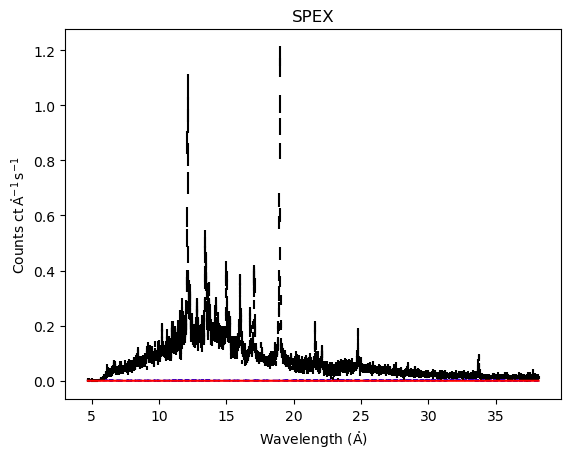

In [10]:
s_plt = s.plot_data(xlog=False, ylog=False,show=True,wave=True)

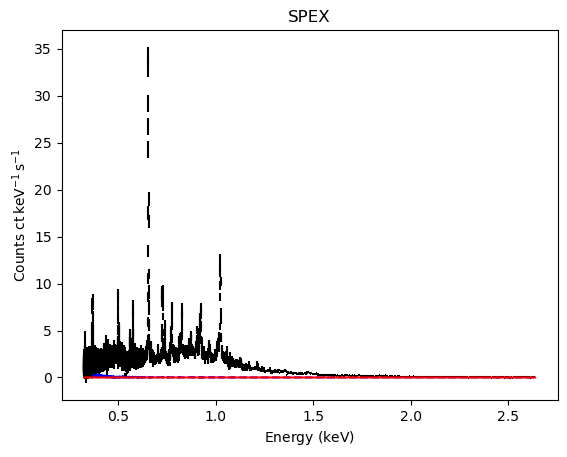

In [17]:
s.plot_data()